In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('../data/dataframe_with_extension.csv')

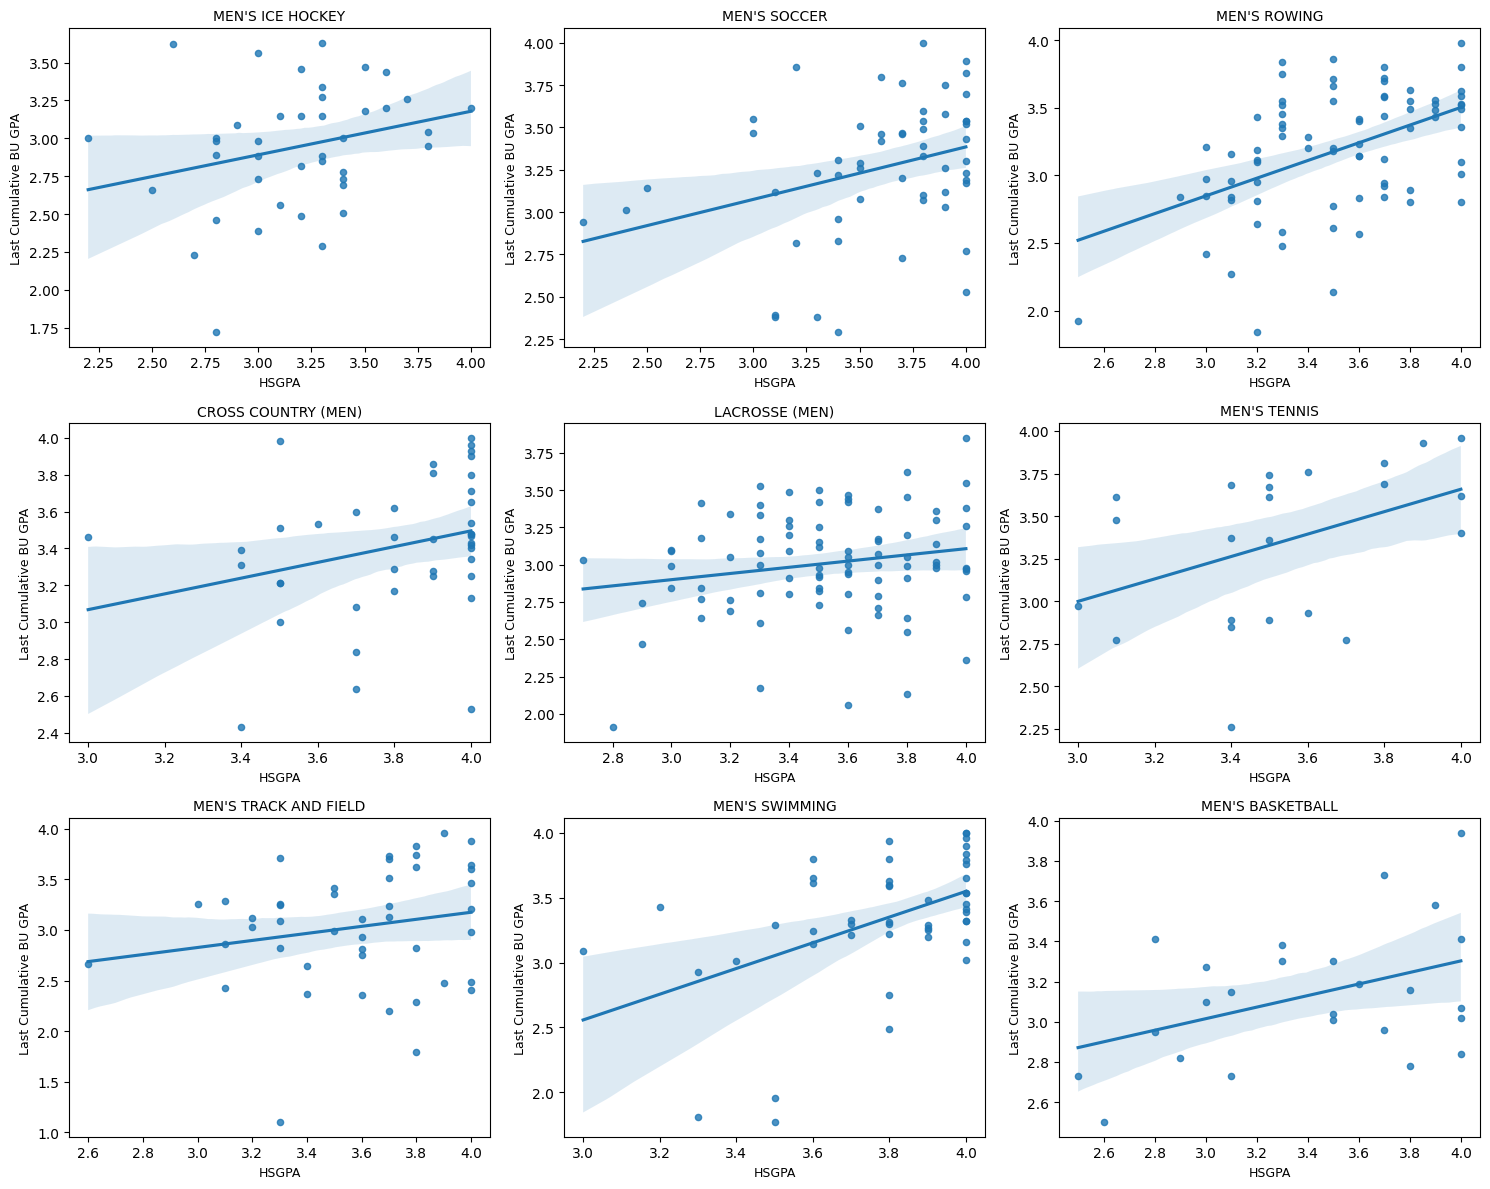

In [17]:
plots_per_row = 3
unique_teams = df['Team Name'].unique()
num_teams_to_plot = plots_per_row * 3 
num_rows = num_teams_to_plot // plots_per_row + (num_teams_to_plot % plots_per_row > 0)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 4 * num_rows))
axes = axes.flatten() 

for i, team in enumerate(unique_teams):
    if i >= num_teams_to_plot:
        break  

    team_df = df[df['Team Name'] == team]
    sns.regplot(ax=axes[i], data=team_df, x='HSGPA', y='Last Cumulative BU GPA', scatter_kws={'s': 20})
    axes[i].set_title(f"{team}", fontsize=10)
    axes[i].set_xlabel("HSGPA", fontsize=9)
    axes[i].set_ylabel("Last Cumulative BU GPA", fontsize=9)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

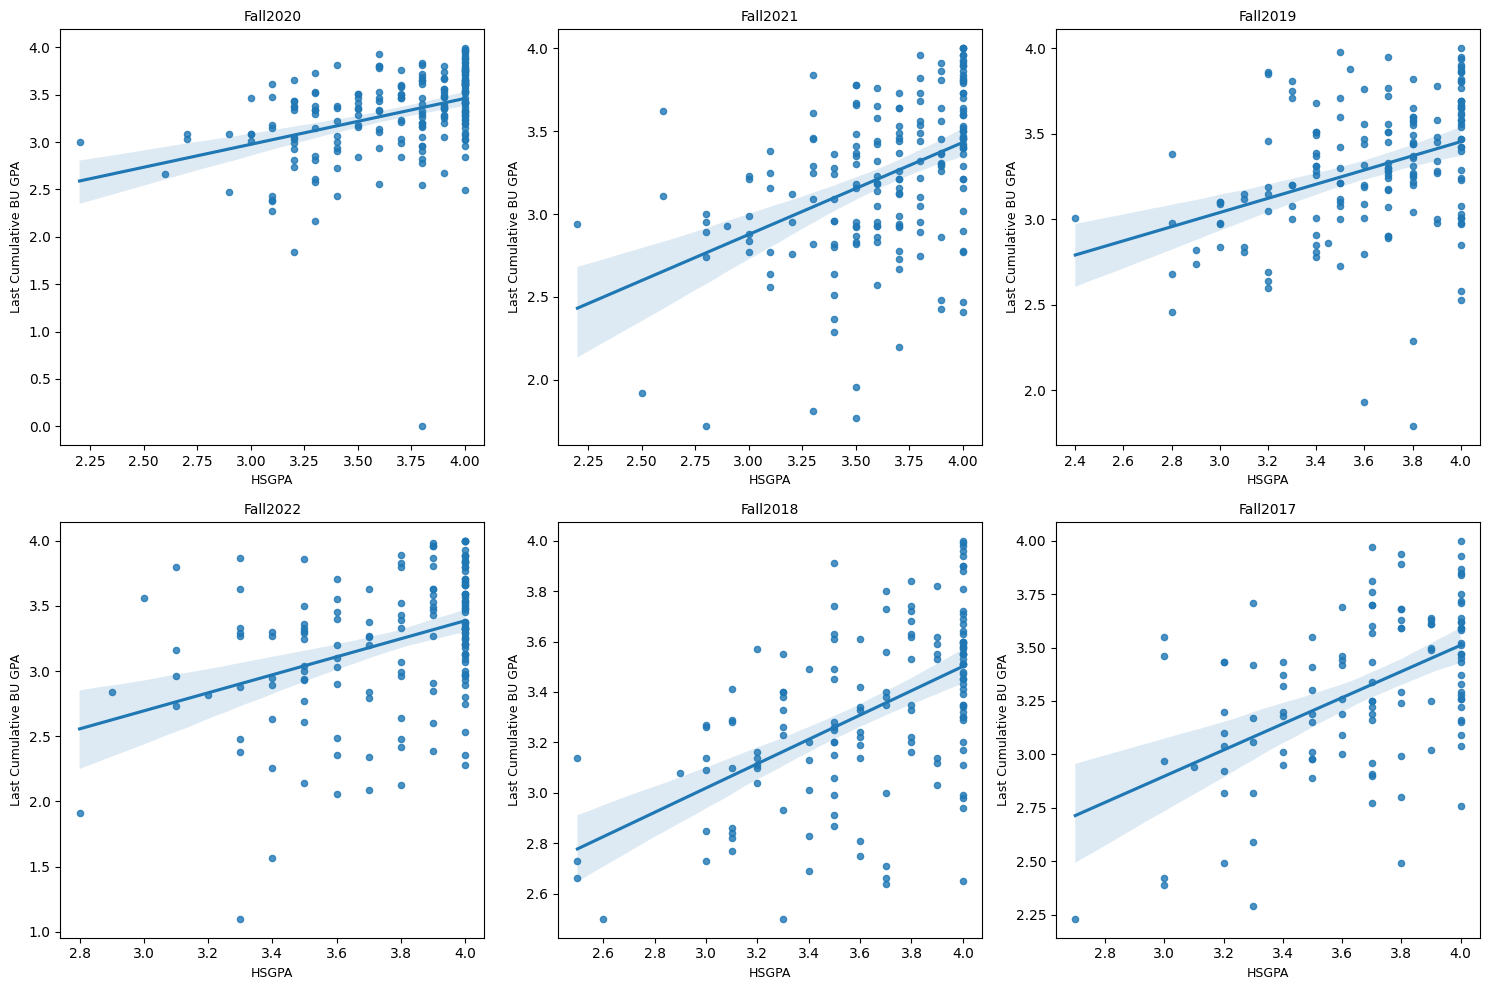

In [18]:

entering_terms = ['Fall2020', 'Fall2021', 'Fall2019', 'Fall2022', 'Fall2018', 'Fall2017']

filtered_df_terms = df[df['Entering Term'].isin(entering_terms)]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten() 

for i, term in enumerate(entering_terms):
    term_df = filtered_df_terms[filtered_df_terms['Entering Term'] == term]
    sns.regplot(ax=axes[i], data=term_df, x='HSGPA', y='Last Cumulative BU GPA', scatter_kws={'s': 20})
    axes[i].set_title(f"{term}", fontsize=10)
    axes[i].set_xlabel("HSGPA", fontsize=9)
    axes[i].set_ylabel("Last Cumulative BU GPA", fontsize=9)

plt.tight_layout()
plt.show()


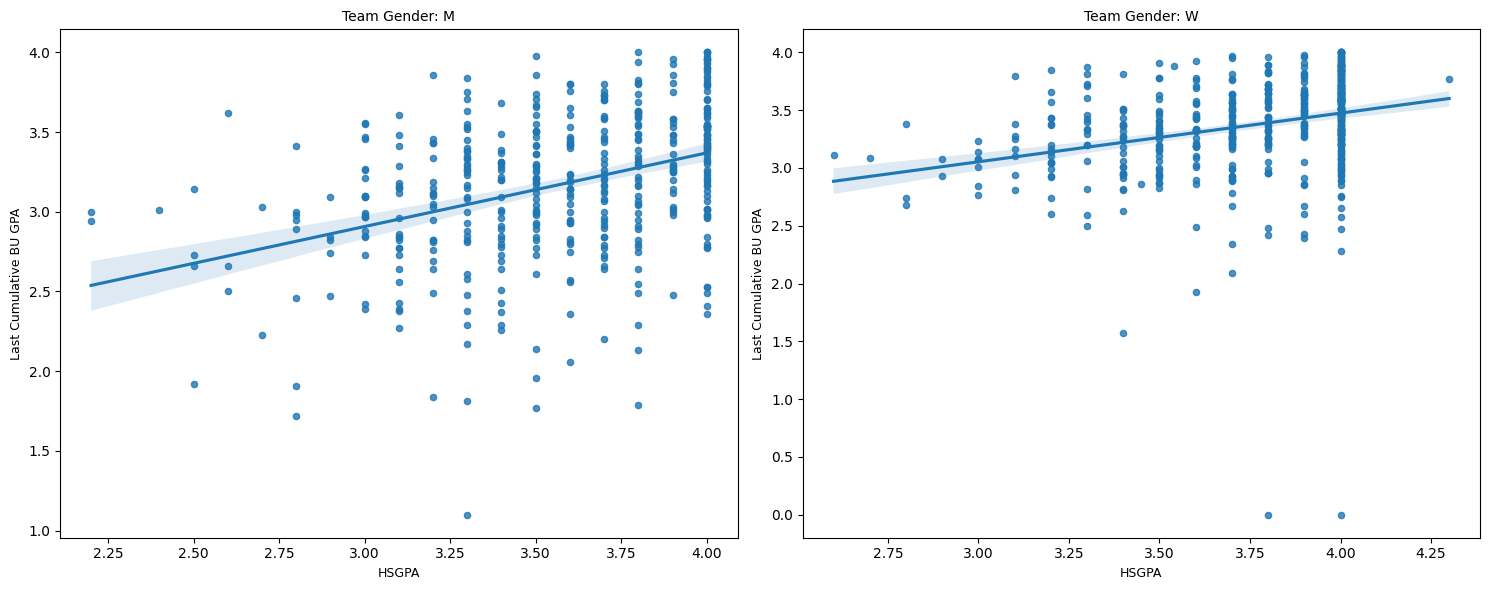

In [19]:
team_genders = df['Team Gender'].unique()
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 
axes = axes.flatten()  

for i, gender in enumerate(team_genders):
    if i >= 2: 
        break
    gender_df = df[df['Team Gender'] == gender]
    sns.regplot(ax=axes[i], data=gender_df, x='HSGPA', y='Last Cumulative BU GPA', scatter_kws={'s': 20})
    axes[i].set_title(f"Team Gender: {gender}", fontsize=10)
    axes[i].set_xlabel("HSGPA", fontsize=9)
    axes[i].set_ylabel("Last Cumulative BU GPA", fontsize=9)

plt.tight_layout()
plt.show()


The GPA range looks better for Woman Gender. Also the best fit line tells too that their consistentcy with high school GPA is little better than Men.

##### Any Significant feature in Polling Data

In [20]:
df = df[['Q15_EXPECTATION_EQUALITY_BY_GENDER', 'Q9_ACADEMIC_SUPPORT_SERVICES', 'Q10_DEVELOPMENT_SERVICES', 'Q14_DIVERSITY_ACCEPTANCE', 'Q16_TIME_DEMAND_AND_LIFE_BALANCE', 'Q1_COACH_LEADERSHIP', 'Q12_SAFETY', 'Q17_COACH_EMPHASIS_ON_ACADEMICS', 'Q3_ASST_COACH_COMMUNICATION', 'Last Cumulative BU GPA', 'HSGPA', 'SATCFORAI' ]]


In [21]:
df.dropna(inplace = True)

In [22]:
import statsmodels.api as sm

X = df[['Q15_EXPECTATION_EQUALITY_BY_GENDER', 'Q9_ACADEMIC_SUPPORT_SERVICES', 'Q10_DEVELOPMENT_SERVICES', 'Q1_COACH_LEADERSHIP', 'HSGPA', 'SATCFORAI' ]]  
y = df['Last Cumulative BU GPA']  

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

                              OLS Regression Results                              
Dep. Variable:     Last Cumulative BU GPA   R-squared:                       0.215
Model:                                OLS   Adj. R-squared:                  0.208
Method:                     Least Squares   F-statistic:                     34.33
Date:                    Tue, 05 Dec 2023   Prob (F-statistic):           9.59e-37
Time:                            18:54:08   Log-Likelihood:                -295.61
No. Observations:                     761   AIC:                             605.2
Df Residuals:                         754   BIC:                             637.7
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

From the above p values, except "Q15_EXPECTATION_EQUALITY_BY_GENDER", no other attribute from polling data is a significant predictor, in determining college GPA. 